<a href="https://colab.research.google.com/github/parth721/Computer-vision-deep-fake-detection/blob/main/MesoNet_for_deepfake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [ ]:
image_dims = {'height':256, 'width':256, 'channels':3}

In [ ]:
#create classifiers

class Classifier :
  def __init__():
    self.model = 0

  def predict(self, x):
    return self.model.predict(x)

  def fit(self, x, y):
    return self.model.train_on_batch(x,y)

  def get_accuracy(self, x, y):
    return self.model.test_on_batch(x,y)

  def load(self, path):
    self.model.load_weights(path)

In [ ]:
# model : mesonet

class Meso4(Classifier):
  def __init__(self, learning_rate =0.001):
    self.model = self.init_model()
    optimizer = Adam(learning_rate = learning_rate)
    self.model.compile(optimizer = optimizer,
                       loss = 'mean_squared_error',
                       metrics = ['accuracy'])


  def init_model(self):
      x = Input(shape = (image_dims['height'],
                         image_dims['width'],
                         image_dims['channels']))

      x1 = Conv2D(8, (3,3), padding='same', activation='relu')(x)
      x1 = BatchNormalization()(x1)
      x1 = MaxPooling2D(pool_size=(2,2), padding='same')(x1)

      x2 = Conv2D(8, (5,5), padding='same', activation='relu')(x1)
      x2 = BatchNormalization()(x2)
      x2 = MaxPooling2D(pool_size=(2,2), padding='same')(x2)

      x3 = Conv2D(16, (5,5), padding='same', activation='relu')(x2)
      x3 = BatchNormalization()(x3)
      x3 = MaxPooling2D(pool_size=(2,2), padding='same')(x3)

      x4 = Conv2D(16, (5,5), padding='same', activation='relu')(x3)
      x4 = BatchNormalization()(x4)
      x4 = MaxPooling2D(pool_size=(4,4), padding='same')(x4)

      y = Flatten()(x4)
      y = Dropout(0.5)(y)
      y = Dense(16)(y)
      y = LeakyReLU(alpha=0.1)(y)
      y = Dropout(0.5)(y)
      y = Dense(1, activation='sigmoid')(y)

      return Model(inputs=x, outputs=y)
model = Meso4()
model.model.summary()

#  def combine_lstm(self):
#     model2 = tf.keras.Sequential([
#        tf.keras.layers.Masking(mask_value=0.),
#         tf.keras.layers.LSTM(512, dropout=0.5, recurrent_dropout=0.5),
#         tf.keras.layers.Dense(256, activation='relu')
#        tf.keras.layers.Droupout(0.5),
#         tf.keras.layers.Dense(len(LABELS), activation='softmax')
#     ])

IndentationError: unexpected indent (<ipython-input-3-ff485efb36bf>, line 44)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# instantiate a Mesonet & pretrained weights
meso = Meso4()
meso.load('/content/drive/MyDrive/weights/Meso4_DF.h5')

In [ ]:
#prepare data

dataGenerator = ImageDataGenerator(rescale=1./255)

generator = dataGenerator.flow_from_directory(
    '/content/drive/MyDrive/meso4testdata',
    target_size=(256,256),
    batch_size=1,
    class_mode='binary'
)

Found 624 images belonging to 2 classes.


In [ ]:
generator.class_indices

{'fake300': 0, 'real300': 1}

1/1 [==============================] - 0s 367ms/step
Predicted label: 0
Actual label: 1

Correct prediction: False


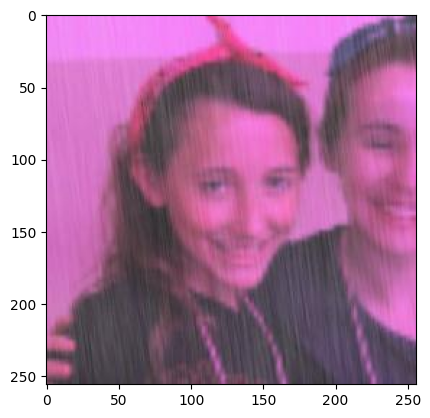

In [ ]:
#test image
X, y = generator.next()

#evaluate predictions
predicted_prob = meso.predict(X)[0][0]
predicted_label = 1 if predicted_prob > 0.5 else 0  # Threshold at 0.5
actual_label = int(y[0])

print(f"Predicted label: {predicted_label}")
print(f"Actual label: {actual_label}")
print(f"\nCorrect prediction: {predicted_label == actual_label}")

# Show image
plt.imshow(np.squeeze(X));


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, LSTM, Dense

# Define the MisoNet model architecture
def MisoNet():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten()
    ])
    return model

#define global variable


# Define the combined model with MisoNet and LSTM
def combined_model():
    model = Sequential([
        MisoNet(),
        tf.keras.layers.Reshape((SEQUENCE_LENGTH, FEATURE_DIMENSION)),
        LSTM(units=128, return_sequences=True),
        LSTM(units=64),
        Dense(NUM_CLASSES, activation='softmax')
    ])
    return model

# Compile the model
model = combined_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


ValueError: Exception encountered when calling layer "reshape_2" (type Reshape).

total size of new array must be unchanged, input_shape = [18432], output_shape = [10, 128]

Call arguments received by layer "reshape_2" (type Reshape):
  • inputs=tf.Tensor(shape=(None, 18432), dtype=float32)